In [36]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# 2. Load the dataset
df = pd.read_csv('/content/creditcard.csv')
print("Initial dataset shape:", df.shape)


Initial dataset shape: (96028, 31)


In [37]:
# 3. Preprocessing
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

# Drop original 'Time' and 'Amount'
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Rearrange columns
scaled_df = df[['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount', 'Class']] + ['Class']]



Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64


In [38]:
# 4. split features and target after removing NaNs in target
scaled_df = scaled_df.dropna(subset=['Class'])  # Remove rows with NaN in target
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']

In [39]:
# 5. Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nAfter SMOTE, Resampled dataset shape:")
print(pd.Series(y_resampled).value_counts())


After SMOTE, Resampled dataset shape:
Class
0.0    95808
1.0    95808
Name: count, dtype: int64


In [40]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [41]:
# 7. Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression ---

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     28586
         1.0       0.98      0.95      0.96     28899

    accuracy                           0.96     57485
   macro avg       0.96      0.96      0.96     57485
weighted avg       0.96      0.96      0.96     57485



In [42]:

# 8. Random Forest Classifier
print("\n--- Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=25, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))



--- Random Forest Classifier ---

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28586
         1.0       1.00      1.00      1.00     28899

    accuracy                           1.00     57485
   macro avg       1.00      1.00      1.00     57485
weighted avg       1.00      1.00      1.00     57485



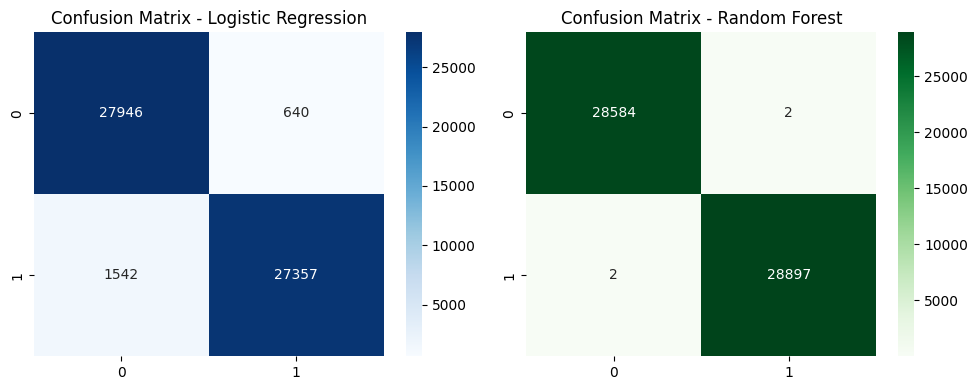

In [43]:
# 9. Confusion Matrix Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")

plt.tight_layout()
plt.show()


ROC-AUC Scores:
Logistic Regression AUC: 0.9931435173950763
Random Forest AUC: 0.9999999679218237


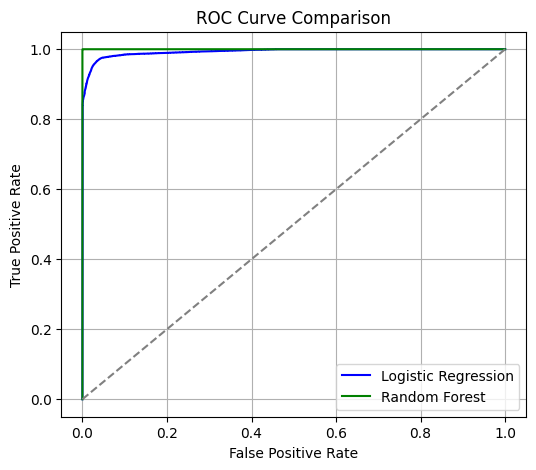

In [44]:
# 10. ROC-AUC Curve and Score
# Predict probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# AUC scores
print("\nROC-AUC Scores:")
print("Logistic Regression AUC:", roc_auc_score(y_test, lr_probs))
print("Random Forest AUC:", roc_auc_score(y_test, rf_probs))

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Plot ROC curves
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression', color='blue')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# 11. Model Performance Comparison Summary
def compare_models(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name:<20} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

print("\nModel Performance Comparison:")
print("------------------------------------------------------------")
compare_models(y_test, y_pred_lr, "Logistic Regression")
compare_models(y_test, y_pred_rf, "Random Forest")


Model Performance Comparison:
------------------------------------------------------------
Logistic Regression  | Precision: 0.9771 | Recall: 0.9466 | F1-Score: 0.9616
Random Forest        | Precision: 0.9999 | Recall: 0.9999 | F1-Score: 0.9999
